 ## EELT 7023 - Tópicos Especiais em Identificação de Sistemas

#### Aluno: 

### $$\textbf{Exercício 1}$$

$\textbf{Problema 01:}$ Estimar o valor de um resistor. Considere:

- $i_0$, $v_0$ e $R_0$ correspondem a valores reais de corrente, tensão e resistência;
- $i$ e $v$ correspondem a valores medidos de corrente e tensão;
- $N = 10$ amostras: $v_0 (t)= R_0\cdot i_0(t)$, $t = 1, 2, \dots, N$;
- $R_0 = 1000\Omega$ ;
- $i_0$ uniformemente distribuída em $[-i_{max}, i_{max}]$, com $i_{max} = 0.01 A$;
- $i(t) = i_0(t)$
- $v(t) = v_0(t) + n_v$, onde $n_v$ é uma distribuição gaussiana de média 0 e variância 1, equivalente a $N(0, \sigma^2 = 1)$;


$\textbf{Objetivo:}$ Minimizar a função quadrática $J(R)$:
$$J(R) = \frac{1}{N} \sum^{N}_{t=1} \left(v(t) - R\cdot i(t)\right)^2$$

dado que o valor $R = \hat{R}$ que minimiza $J(R)$ é dado por
$$\hat{R} = \frac{\sum^{N}_{t=1} v(t)i(t)}{\sum^{N}_{t=1}i^2(t)}$$


$\textbf{Resolução:}$ Primeiramente as variáveis relacionadas aos dados reais foram inicializadas:

In [1]:
N = 10;
i_max = 0.01;
R0 = 1000;

# A função rand retorna N valores aleatórios entre 0 e 1 na forma de array
# O primeiro argumento indica o tipo desejado para os valores do array

i0 = (rand(Float64, N) .- 0.5) * 2 * i_max;
v0 = R0 * i0;

Em seguida foram inicializadas as variáveis relativas às medições (com imprecisões / ruído apenas nas leituras de tensão):

In [2]:
# Essa biblioteca é necessária para utilizar uma distribuição normal
using Distributions

i = i0[:];
v = v0 + rand(Distributions.Normal(0, 1 ^ 2), N);

Para encontrar o valor de $\hat{R}$ basta aplicar sua fórmula:

In [3]:
R_chapeu = (v' * i) / (i' * i)


981.3044178344594

Para executar essa rotina diversas vezes, criou-se uma função que estima o valor de $R$ nas condições dadas do problema:

In [4]:
function estima_resistencia(N)
    # N é o número de pontos de medição utilizados no cálculo
    i_max = 0.01;
    R0 = 1000;
    i0 = (rand(Float64, N) .- 0.5) * 2 * i_max;
    v0 = R0 * i0;
    i = i0[:];
    v = v0 + rand(Distributions.Normal(0, 1 ^ 2), N);
    return (v' * i) / (i' * i)
end

estima_resistencia (generic function with 1 method)

A rotina a seguir executa a estimação de $\hat{R}$ 100 vezes e armazena os valores obtidos num array $\textit{R_estimativas}$

In [5]:
R_estimativas = zeros(100);

for i = 1:100
    R_estimativas[i] = estima_resistencia(10);
end

Apresentando o resultado de forma gráfica, tem-se:

In [6]:
# Biblioteca necessária para plotar gráficos
using Plots
pyplot()

Plots.PyPlotBackend()

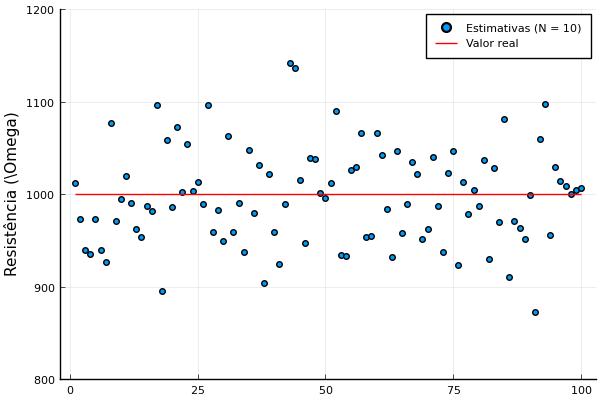

In [7]:
scatter(1:100, R_estimativas, label = "Estimativas (N = 10)")
plot!(1:100, ones(100)*1e3, 
    color = :red,
    ylabel = "Resistência (\\Omega)",
    ylim = (800, 1200),
    label = "Valor real"
    )

In [8]:
println("Valor médio: ", mean(R_estimativas))

println("Desvio padrão: ", std(R_estimativas))

println("Valor máximo: ", maximum(R_estimativas))
println("Valor mínimo: ", minimum(R_estimativas))

Valor médio: 997.3138825627819
Desvio padrão: 52.397232237022855
Valor máximo: 1141.2444586177683
Valor mínimo: 872.8509453083406


É possível notar que, por mais que o valor médio das $100$ estimativas esteja próximo de $1000$ (o valor real), os valores estão relativamente dispersos, distribuídos no intervalo de $843$ a $1164$.

Para avaliar a influência do número de medidas utilizadas nos cálculos ($N$), o procedimento anterior será repetido para quatro valores distintos de $N$: $10$, $100$, $1000$ e $10000$.

In [9]:
# Biblioteca de DataFrames utilizada para organizar melhor os resultados
using DataFrames
# Biblioteca utilizada para plots de densidade de probabilidade mais adiante
using StatsPlots

In [10]:
results = DataFrame(N10 = zeros(100), N100 = zeros(100), N1000 = zeros(100), N10000 = zeros(100) , Real = ones(100)*1e3)

for i = 1:100
    results[i, :N10]  = estima_resistencia(10);
    results[i, :N100]  = estima_resistencia(100);
    results[i, :N1000]  = estima_resistencia(1000);
    results[i, :N10000]  = estima_resistencia(10000);
end

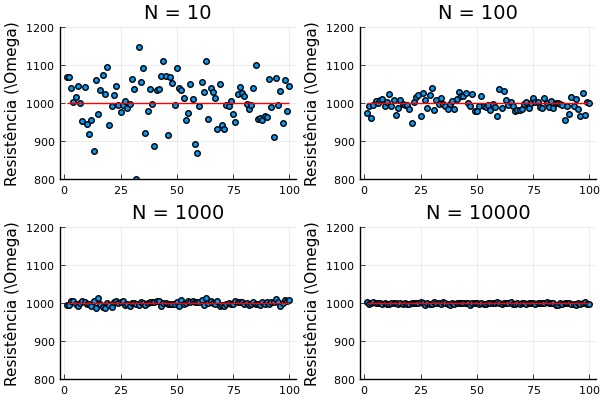

In [11]:
plot_N10 = plot(results.N10, title = "N = 10", linetype = :scatter)
plot!(results.Real, color = :red, ylabel = "Resistência (\\Omega)", ylim = (800, 1200), linetype = :line)

plot_N100 = plot(results.N100, title = "N = 100", linetype = :scatter)
plot!(results.Real, color = :red, ylabel = "Resistência (\\Omega)", ylim = (800, 1200), linetype = :line)

plot_N1000 = plot(results.N1000,title = "N = 1000", linetype = :scatter)
plot!(results.Real, color = :red, ylabel = "Resistência (\\Omega)", ylim = (800, 1200), linetype = :line)

plot_N10000 = plot(results.N10000, title = "N = 10000", linetype = :scatter)
plot!(results.Real, color = :red, ylabel = "Resistência (\\Omega)", ylim = (800, 1200), linetype = :line)

plot(plot_N10, plot_N100, plot_N1000, plot_N10000, layout = (2, 2), legend = false)

É possível notar claramente que, quanto maior o número $N$ de amostras coletadas, maior a proximidade das estimativas com o resultado real. Isso fica claro graficamente, mas também pelas estatísticas dos resultados:

In [12]:
describe(results, :min, :mean, :max, :std)

,variable,min,mean,max,std
,Symbol,Float64,Float64,Float64,Float64
1,N10,801.221,1006.03,1147.64,58.7834
2,N100,948.266,997.974,1039.73,17.5829
3,N1000,986.854,1000.32,1014.19,5.16506
4,N10000,995.565,999.801,1004.04,1.69809
5,Real,1000.0,1000.0,1000.0,0.0


É possível notar que, quanto maior o valor de $N$, menor é o desvio padrão, indicando que as amostras se concentram mais próximas de $1000 \Omega$. 

O gráfico abaixo apresenta a curva de densidade de probabilidade para cada valor de $N$, ficando nítida a redução do desvio padrão e a maior proximidade com o resultado esperado para valores mais altos de $N$.

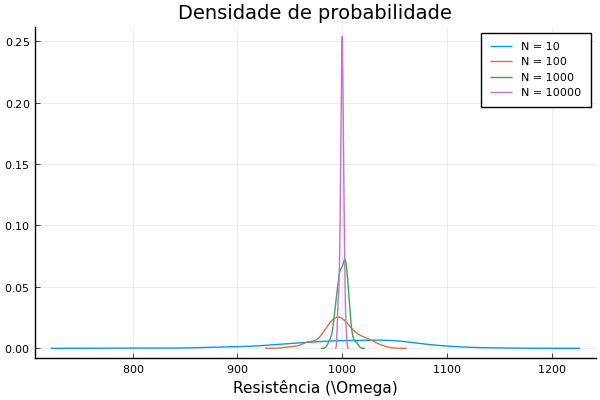

In [13]:
@df results density([:N10, :N100, :N1000, :N10000], 
    title="Densidade de probabilidade", 
    label=["N = 10" "N = 100" "N = 1000" "N = 10000"],
    xlabel = "Resistência (\\Omega)"
)